<a href="https://colab.research.google.com/github/KhanShaheb34/MachineLearning-Lab/blob/master/Assignments/ML02%3A%20Logistic%20Regression%20Regularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 4.46MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy import optimize
from scipy.special import expit
import copy
import math

In [3]:
data = pd.read_csv('data2.txt', header=None, names = ["x1","x2","y"])
data.shape

(118, 3)

In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
  neg = data['y'] == 0
  pos = data['y'] == 1
  
  if axes == None:
      axes = plt.gca()
  axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='red', label=label_pos)
  axes.scatter(data[neg]['x1'], data[neg]['x2'], marker='x', c='blue', label=label_neg)
  axes.set_xlabel(label_x)
  axes.set_ylabel(label_y)
  axes.legend(frameon= True, fancybox = True);

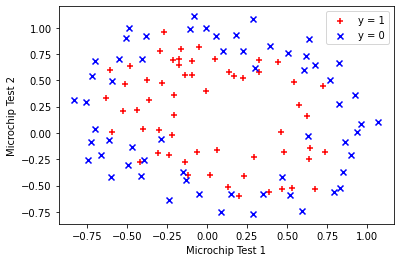

In [5]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [6]:
n = data.shape[1]-1
x = data[data.columns[0:n]]
y = data[data.columns[n:n+1]]

X = x.values
y = y.values

In [19]:
def mapFeature(x1col, x2col):
  """
  take in numpy array of x1 and x2, return all polynomial terms up to the given degree
  """
  degrees = 10
  out = np.ones( (x1col.shape[0], 1) )

  for i in range(1, degrees+1):
    for j in range(0, i+1):
      term1 = x1col ** (i-j)
      term2 = x2col ** (j)
      term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
      out   = np.hstack(( out, term ))
  return out

In [20]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [21]:
def h(theta,X):
  """
  Take in numpy array of theta and X to return prediction
  """
  return expit(np.dot(X,theta))

In [22]:
def computeCost(theta,X,Y,Lambda = 0.): 
  """
  Take in numpy array of theta, X, and y to return the cost
  """
  m = Y.size

  term1 = np.dot(-np.array(Y).T,np.log(h(theta,X)))
  term2 = np.dot((1-np.array(Y)).T,np.log(1-h(theta,X)))
  regterm = (Lambda/2) * np.sum(np.dot(theta[1:].T,theta[1:]))
  return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [23]:
def sigmoid(z):
  """
  return the sigmoid of z
  """
  z = np.clip( z, -500, 500 )
  g = 1.0/(1.0+np.exp(-z))
  return g

In [24]:
def compute_gradient_logistic(X, y, w):
  """
  Take in numpy array of X, and y to return the gradient of logistic regression
  """
  m,n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))
    err_i  = f_wb_i  - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]
  dj_dw = dj_dw/m
      
  return dj_dw

In [28]:
initial_theta = np.zeros(XX.shape[1])

def optimizeRegularizedTheta(theta, X, Y, alpha, num_iters, lmbda=0.):
  m = X.shape[0]
  cost_history = []
  w = np.array(theta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(X, Y, w)
    w = w * (1 - alpha * (lmbda / m)) - alpha * dj_dw
    cost_history.append(computeCost(w, X, Y, lmbda))
    if i%500 == 0:
        print(f"Iteration {i}: Cost {cost_history[-1]}")
  return w, min(cost_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

Iteration 0: Cost 0.691100342525338
(66,)
0.6089396397803091


In [29]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .01
    iters = 5000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration 0: Cost 0.6929404864896525
Iteration 100: Cost 0.6758937748022636
Iteration 200: Cost 0.6635170922644468
Iteration 300: Cost 0.6536383314345318
Iteration 400: Cost 0.6452441817060754
Iteration 500: Cost 0.6378344364965746
Iteration 600: Cost 0.6311388893489165
Iteration 700: Cost 0.624996264836021
Iteration 800: Cost 0.6193009653865684
Iteration 900: Cost 0.613978449807431
Iteration 1000: Cost 0.6089731028458444
Iteration 1100: Cost 0.6042417967196558
Iteration 1200: Cost 0.5997501863279276
Iteration 1300: Cost 0.5954704017920543
Iteration 1400: Cost 0.5913795078535491
Iteration 1500: Cost 0.5874584169199367
Iteration 1600: Cost 0.5836910903877749
Iteration 1700: Cost 0.5800639347590868
Iteration 1800: Cost 0.5765653358649961
Iteration 1900: Cost 0.5731852945152104
Iteration 2000: Cost 0.5699151385087614
Iteration 2100: Cost 0.5667472931450162
Iteration 2200: Cost 0.5636750971123797
Iteration 2300: Cost 0.5606926539029266
Iteration 2400: Cost 0.5577947112431277
Iteration 2500

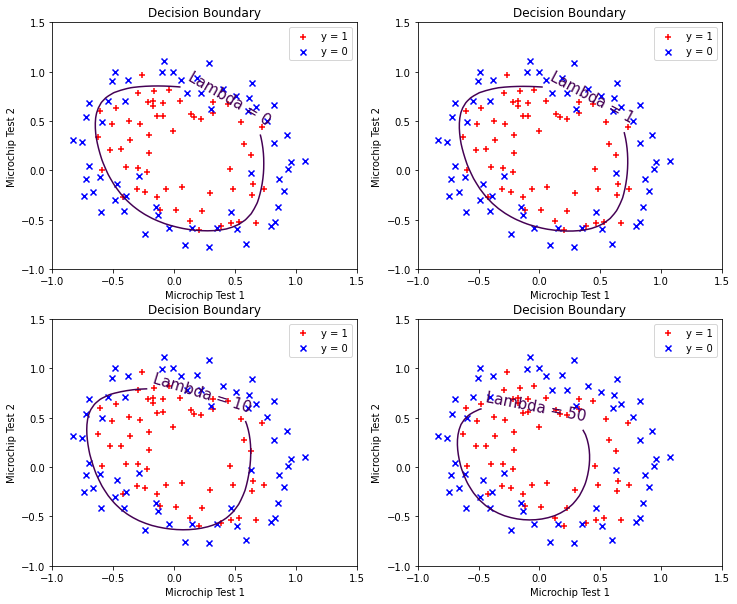

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)